In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/opt/hydra/')

import library.analysis as hydra

In [2]:
exp_path = '../data/synovial-microarray-34-processed.tsv'
mm_path = '../fit/micro-34-filter/MultiModalGenes'

In [3]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

In [4]:
exp.shape

(15307, 34)

[0.15, 0.16, 0.17, 0.19, 0.2]


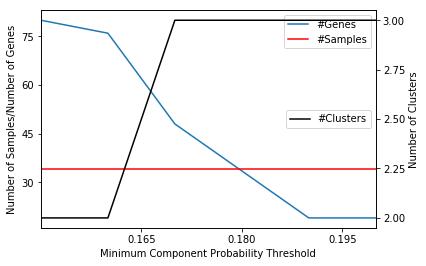

In [5]:
min_prob_range = [round(x, 2) for x in np.linspace(0.15, 0.2, 5)]
print(min_prob_range)
scan = hydra.ScanEnrichmentAnalysis(mm_path, 
                                    exp_path, 
                                    'GO', 
                                    min_prob_range=min_prob_range,
                                    CPU=7).scan()

In [6]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.15,5,epidermis development|humoral immune response|...,LGR5|PTGS2|PCK1|PKP1|LCN2|UGT8|KLK13|ISL2|DEFB...,80,2,34
0.16,4,epidermis development|plasma membrane bounded ...,LGR5|PTGS2|PCK1|PKP1|LTF|EPHA8|UGT8|KLK13|ISL2...,76,2,34
0.17,4,neuron projection morphogenesis|plasma membran...,LGR5|KRT5|PKP1|EPHA8|UGT8|KLK13|ISL2|KLK7|BCL1...,48,3,34
0.19,1,epidermis development,SLITRK6|LGR5|FZD3|PKP1|KRT80|WNT10A|FA2H|DSP|K...,19,3,34
0.20,1,epidermis development,SLITRK6|LGR5|FZD3|PKP1|KRT80|WNT10A|FA2H|DSP|K...,19,3,34


In [7]:
import numpy as np

mm = hydra.EnrichmentAnalysis(mm_path,
                              exp_path,
                              min_prob_filter=0.2,
                              gmt_path='GO')

In [8]:
clus = hydra.MultivariateMixtureModel(data=exp.reindex(mm.get_enriched_term_genes()),
                                      center=True,
                                      gamma=5.0,
                                      variance=2.0,
                                      K=1)

In [9]:
cfeat = clus.get_cluster_features(exp)

In [10]:
cfeat[0].head(50)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
CONDENSATION OF PROPHASE CHROMOSOMES%REACTOME%R-HSA-2299718.1,0.000130,0.010392,0.620141,3.577388,0,54,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
PRC2 METHYLATES HISTONES AND DNA%REACTOME%R-HSA-212300.1,0.000131,0.010392,0.603582,3.543788,0,58,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
DNA METHYLATION%REACTOME DATABASE ID RELEASE 66%5334118,0.000130,0.010392,0.615536,3.497807,0,51,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
ACTIVATION OF RRNA EXPRESSION BY ERCC6 (CSB) AND EHMT2 (G9A)%REACTOME DATABASE ID RELEASE 66%427389,0.000131,0.010392,0.581109,3.442652,0,60,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
RNA POLYMERASE I PROMOTER OPENING%REACTOME DATABASE ID RELEASE 66%73728,0.000130,0.010392,0.609503,3.442571,0,50,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
MEIOTIC RECOMBINATION%REACTOME DATABASE ID RELEASE 66%912446,0.000132,0.010392,0.553004,3.411171,0,70,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
ACTIVATED PKN1 STIMULATES TRANSCRIPTION OF AR (ANDROGEN RECEPTOR) REGULATED GENES KLK2 AND KLK3%REACTOME DATABASE ID RELEASE 66%5625886,0.000130,0.010392,0.589084,3.389267,0,53,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
PACKAGING OF TELOMERE ENDS%REACTOME DATABASE ID RELEASE 66%171306,0.000131,0.010392,0.623862,3.299245,0,40,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...
SIRT1 NEGATIVELY REGULATES RRNA EXPRESSION%REACTOME%R-HSA-427359.2,0.000131,0.010392,0.567851,3.290763,0,55,HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST...


In [11]:
cfeat[0].loc['PRC2 METHYLATES HISTONES AND DNA%REACTOME%R-HSA-212300.1', 'leadingEdge']

'HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST4H4|HIST1H4F|HIST1H4A|HIST1H4H|HIST1H2BD|HIST1H2BH|HIST1H2AC|HIST1H2BK|HIST1H3G|HIST1H3F|HIST1H3E|HIST1H2BO|HIST1H3B|HIST1H2BL|HIST1H3D|HIST1H2AB|HIST1H2BC|AEBP2|HIST1H2BB|HIST1H2BM|HIST1H3J|HIST1H3C|HIST1H4B|RBBP7|HIST1H2BI|H2AFV|HIST1H2AD|HIST1H3I|H2AFZ|RBBP4|HIST2H2AC|H2AFX|H3F3B|HIST2H2AA4|HIST1H4L|SUZ12|HIST1H2BG|MTF2'

In [12]:
cfeat[0].loc['CONDENSATION OF PROPHASE CHROMOSOMES%REACTOME%R-HSA-2299718.1', 'leadingEdge']

'HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST4H4|HIST1H4F|HIST1H4A|HIST1H4H|HIST1H2BD|HIST1H2BH|HIST1H2AC|HIST1H2BK|HIST1H3G|HIST1H3F|HIST1H3E|HIST1H2BO|HIST1H3B|HIST1H2BL|HIST1H3D|HIST1H2AB|HIST1H2BC|RB1|HIST1H2BB|HIST1H2BM|HIST1H3J|HIST1H3C|HIST1H4B|HIST1H2BI|H2AFV|HIST1H2AD|HIST1H3I|H2AFZ|HIST2H2AC|H2AFX|HIST3H3|H3F3B|HIST2H2AA4|HIST1H4L|CDK1|HIST1H2BG'

In [13]:
cfeat[0].loc['ACTIVATED PKN1 STIMULATES TRANSCRIPTION OF AR (ANDROGEN RECEPTOR) REGULATED GENES KLK2 AND KLK3%REACTOME DATABASE ID RELEASE 66%5625886', 'leadingEdge']

'HIST1H4J|HIST1H4K|HIST1H4I|H2AFJ|HIST2H4B|HIST4H4|HIST1H4F|HIST1H4A|HIST1H4H|HIST1H2BD|HIST1H2BH|HIST1H2AC|HIST1H2BK|HIST1H3G|HIST1H3F|HIST1H3E|HIST1H2BO|HIST1H3B|HIST1H2BL|HIST1H3D|HIST1H2AB|HIST1H2BC|HIST1H2BB|HIST1H2BM|HIST1H3J|HIST1H3C|HIST1H4B|HIST1H2BI|H2AFV|KDM4C|HIST1H2AD|HIST1H3I|H2AFZ|HIST2H2AC|H2AFX|KLK2|H3F3B|HIST2H2AA4|HIST1H4L|HIST1H2BG'

In [14]:
cfeat[1].head()

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
MITOTIC PROMETAPHASE%REACTOME DATABASE ID RELEASE 66%68877,0.000106,0.004796,0.440787,3.235403,0,155,RAD21|ODF2|PDS5B|DYNC1LI2|PPP2R1A|XPO1|HAUS6|C...
PROCESSING OF CAPPED INTRON-CONTAINING PRE-MRNA%REACTOME%R-HSA-72203.3,0.000103,0.004796,0.411391,3.190126,0,205,CHERP|ZC3H11A|THOC2|CWC22|CTNNBL1|U2SURP|HNRNP...
NCRNA PROCESSING%GOBP%GO:0034470,0.000102,0.004796,0.401891,3.178589,0,229,AGO2|NVL|FBL|NOL10|TFB2M|WDR4|UTP20|RIOK1|EXOS...
RIBONUCLEOPROTEIN COMPLEX BIOGENESIS%GOBP%GO:0022613,0.000100,0.004796,0.385125,3.166058,0,289,AGO2|NVL|FBL|LSM14A|LTV1|RPL6|NOL10|TFB2M|PA2G...
MRNA PROCESSING%GOBP%GO:0006397,0.000100,0.004796,0.385504,3.158585,0,281,SYNCRIP|SCAF8|RBM41|CHERP|GTF2H3|CMTR2|PRMT9|Z...


In [15]:
cfeat[2].head()

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
KERATINIZATION%GOBP%GO:0031424,0.000156,0.005386,0.560097,4.101957,0,113,KLK5|KRT6B|KRT80|KRT16|PPL|KRT17|SPINK5|KRT4|K...
CORNIFICATION%GOBP%GO:0070268,0.000155,0.005386,0.606048,4.033788,0,79,KLK5|KRT6B|KRT80|KRT16|PPL|KRT17|SPINK5|KRT4|K...
KERATINOCYTE DIFFERENTIATION%GOBP%GO:0030216,0.000160,0.005435,0.522034,4.021085,0,139,KLK5|KRT6B|KRT80|KRT16|PPL|KRT17|SPINK5|KRT4|K...
KERATINIZATION%REACTOME DATABASE ID RELEASE 66%6805567,0.000158,0.005399,0.532961,3.963745,0,121,KLK5|KRT6B|KRT80|KRT16|PPL|KRT17|SPINK5|KLK8|K...
EPIDERMAL CELL DIFFERENTIATION%GOBP%GO:0009913,0.000163,0.005468,0.493276,3.919885,0,158,KLK5|KRT6B|KRT80|KRT16|PPL|KRT17|SPINK5|KRT4|K...


In [16]:
pth = '../data/pdata-group-1.tsv'
p1 = pd.read_csv(pth, sep='\t', index_col=1)
p1.head()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_city,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age group:ch1,cinsarc group:ch1,fusion transcrit:ch1,metastasis:ch1,time:ch1
SS100,GSM983677,GSM983677,Public on Aug 09 2014,Aug 09 2012,Aug 09 2014,RNA,1,pharynx,Homo sapiens,cinsarc group: C1,...,Bordeaux,33076,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM983n...,34183,pediatric,C1,SSX1,no,1.725
SS101,GSM983678,GSM983678,Public on Aug 09 2014,Aug 09 2012,Aug 09 2014,RNA,1,femur left,Homo sapiens,cinsarc group: C2,...,Bordeaux,33076,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM983n...,34183,adult,C2,SSX1,yes,0.665
SS102,GSM983679,GSM983679,Public on Aug 09 2014,Aug 09 2012,Aug 09 2014,RNA,1,"wrist, radiocarpal joint",Homo sapiens,cinsarc group: C2,...,Bordeaux,33076,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM983n...,34183,adult,C2,SSX1,yes,0.419
SS103,GSM983680,GSM983680,Public on Aug 09 2014,Aug 09 2012,Aug 09 2014,RNA,1,femur right,Homo sapiens,cinsarc group: C1,...,Bordeaux,33076,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM983n...,34183,adult,C1,SSX2,yes,0.731
SS104,GSM983681,GSM983681,Public on Aug 09 2014,Aug 09 2012,Aug 09 2014,RNA,1,left ankle,Homo sapiens,cinsarc group: C1,...,Bordeaux,33076,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM983n...,34183,adult,C1,SSX1,no,5.424


In [17]:
surv = pd.DataFrame(columns=['sample', 'cluster', 'fusion', 'metastasis', 'time'])

for sample, assignment in zip(exp.columns, clus.get_assignments(exp)):
    met = 1 if p1.loc[sample, 'metastasis:ch1'] == 'yes' else 0
    surv.loc[len(surv), :] = [sample, assignment, p1.loc[sample, 'fusion transcrit:ch1'], met, p1.loc[sample, 'time:ch1']]

In [18]:
for i, rows in surv.groupby('cluster'):
    print(i)
    print(rows)

0
   sample cluster fusion metastasis   time
0   SS100       0   SSX1          0  1.725
2   SS102       0   SSX1          1  0.419
6   SS106       0   SSX1          1  0.704
7   SS107       0   SSX1          1  0.337
9   SS109       0   SSX2          0  0.745
15  SS115       0   SSX1          1   1.81
18  SS118       0   SSX1          1   1.84
19  SS119       0   SSX2          1    1.5
22  SS122       0   SSX2          0  1.248
23  SS123       0   SSX2          0  6.174
25  SS125       0   SSX2          1  0.337
27  SS127       0   SSX2          0   9.78
31  SS131       0   SSX1          0  6.861
32  SS132       0   SSX2          0  4.701
33  SS133       0   SSX1          0  3.493
1
   sample cluster fusion metastasis    time
1   SS101       1   SSX1          1   0.665
4   SS104       1   SSX1          0   5.424
5   SS105       1   SSX2          1   0.884
8   SS108       1   SSX1          1   1.399
11  SS111       1   SSX1          0  10.209
14  SS114       1   SSX2          1   0.871


In [20]:
surv.to_csv("../data/micro-34-survival-data.tsv", sep='\t', index=False)